## ggplot2: Tutorial and Statistical Analysis
**Date**: February 28th, 2018

**Speaker**: Meredith Broadway meredith.broadway@owen.vanderbilt.edu 

## Description

In this VIDL workshop, we'll learn how to leaverage R's **ggplot2** (and complimentary libraries) to create effective data visualization. 

Two complimentary visualization libraries we'll be using: **GGally** and **hexbin**. 
Additional libraries we'll need to manipulate data: **dplyr**, **MASS**, **tidyr**, and **lubridate**. 

In [169]:
# Call libraries
library(ggplot2)
library(dplyr)
library(tidyr)
library(GGally) 
library(hexbin)
library(MASS)

In [170]:
# Read data in
## Pre-process data 
nazi <- read.csv("C:/Users/broadwmc/Desktop/nazi.csv") 
nazi <- nazi[rep(rownames(nazi), nazi$count), ]
rownames(nazi) <- NULL
nazi[6] <- NULL 

### Nazi dataset
This dataset contains data from membership cards of the NS Teachers League in the Berlin Document Center, comparing Nazis with other Germans. 

Jarausch, Konrad H., and Gerhard Arminger. "The German Teaching Profession and Nazi Party Membership: A Demographic Logit Model." *Journal of Interdisciplinary History* 20, no. 2 (1989): 197. doi:10.2307/204832. 

In [171]:
## Questions for analysis --
      # Did more male or female teachers support/not support Nazis?
      # Did more religious/non-religious teachers support/not support Nazis? 
      # What religion supported/did not suport Nazis the most in each era? 
      # Did more Nazi-supporting teachers live in rural or urban environments? 

In [172]:
summary(nazi)

       religion             cohort        residence       gender    
 Catholic  :4114   Early Weimar:3608   rural   :5044   female:5127  
 None      :3209   Empire      :1771   suburban:8522   male  :8439  
 Protestant:6243   Late Empire :2815                                
                   Late Weimar :3068                                
                   Third Reich :2304                                
 membership 
 no :10482  
 yes: 3084  
            
            
            

In [173]:
colnames(nazi)

[1] "religion"   "cohort"     "residence"  "gender"     "membership"

In [174]:
table(nazi)

, , residence = rural, gender = female, membership = no

            cohort
religion     Early Weimar Empire Late Empire Late Weimar Third Reich
  Catholic            171     36          82         128         213
  None                 43     12          24          96         253
  Protestant           90     12          46          92         147

, , residence = suburban, gender = female, membership = no

            cohort
religion     Early Weimar Empire Late Empire Late Weimar Third Reich
  Catholic            274     73         193         211         192
  None                114     93          59         288         307
  Protestant          344    155         318         314         256

, , residence = rural, gender = male, membership = no

            cohort
religion     Early Weimar Empire Late Empire Late Weimar Third Reich
  Catholic            189    101         127         158         125
  None                 71     72          74          93         192
  Protesta

### Did more male or female teachers support Nazis? 
We are dealing with both quantitative and categorical (membership: yes, no) data. Let's visualize with a barchart.  

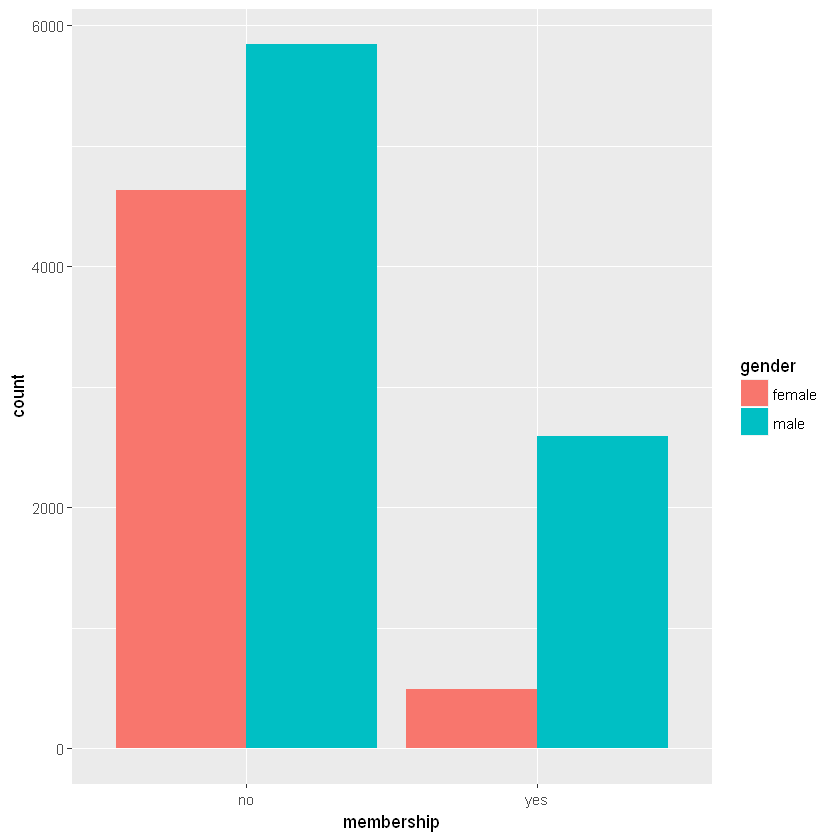

In [175]:
# Make a simple barchart 
ggplot(nazi, aes(membership, ..count..)) + geom_bar(aes(fill = gender), position = "dodge")


### What religions did/did not support Nazism? 
We can visualize the distribution of religious Nazi supporters and Nazi resisters in the same way: 
change the x axis to religion and fill to membership 

Tidy data by putting bars in DESC order using the factor() function; R will automatically organize your data in alphabetical order. 

Change barchart colors for a better looking visualization 

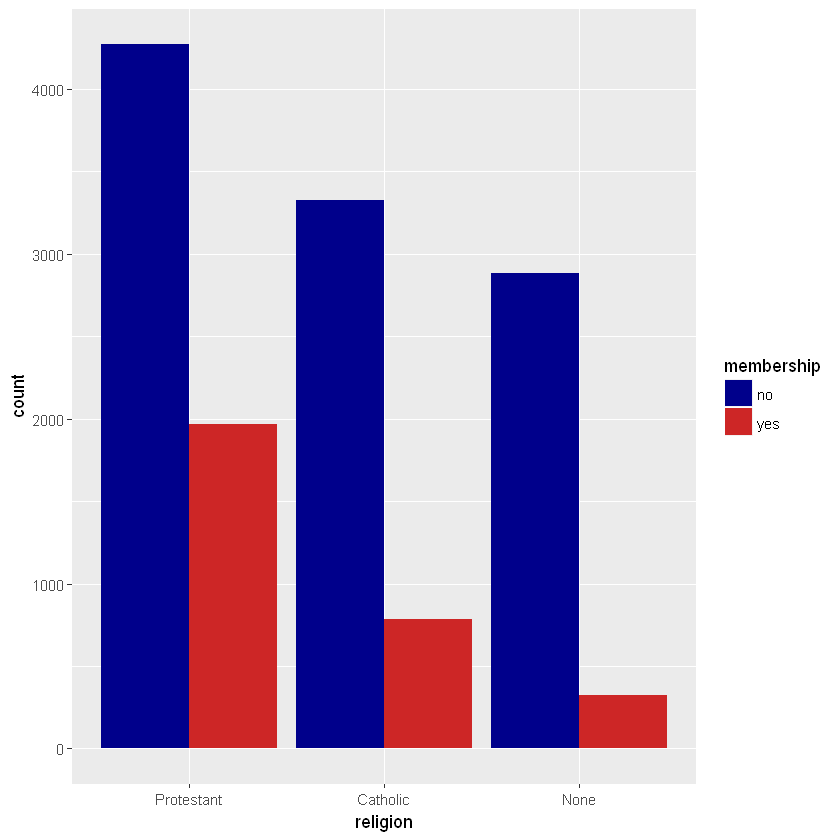

In [176]:
nazi$religion <- factor(nazi$religion, levels=c("Protestant", "Catholic", "None"))
ggplot(nazi, aes(religion, ..count..)) + geom_bar(aes(fill = membership), position = "dodge") + scale_fill_manual(values=c("blue4", "firebrick3"))

### What religions supported/did not support Nazism the most in each era? 
To create more complex visualizations, we'll use the dplyr library and piping %>% -- to select and filter data.

We should use the factor() function again. This time to factor our cohort in chronological order. 

The most effective visualization we can use is a stacked barchart 

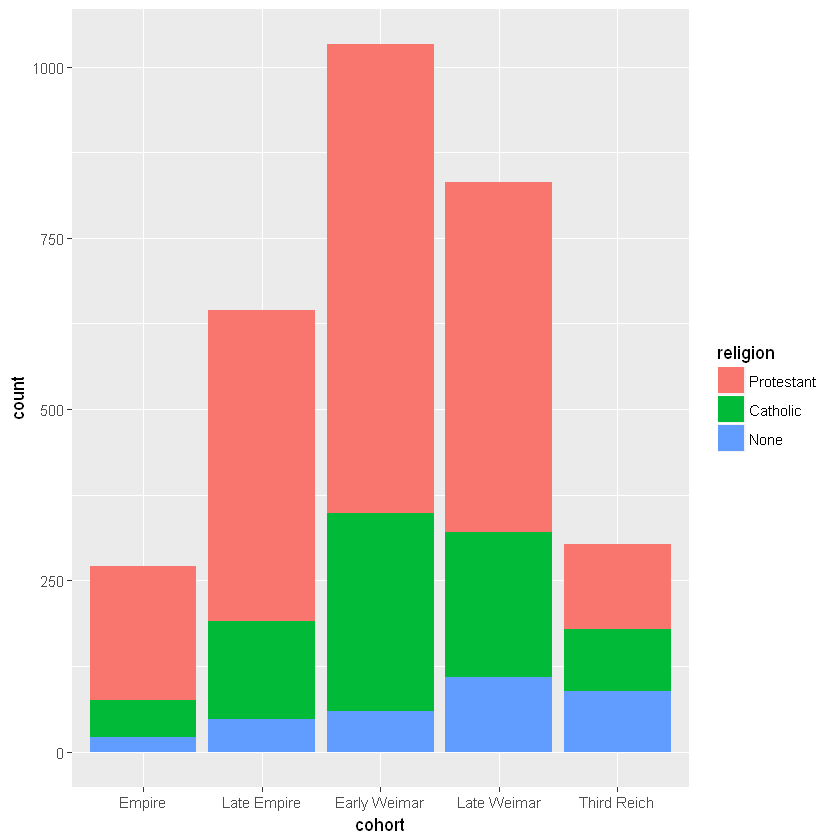

In [177]:
nazi$cohort <- factor(nazi$cohort,levels = c("Empire", "Late Empire", "Early Weimar", "Late Weimar", "Third Reich"))
nazi %>%
  dplyr::select(religion, cohort, membership) %>%
  filter(membership == "yes") %>%
  ggplot(mapping = aes(x = cohort, fill=religion)) +
  geom_bar()

Faceting (facet_grid) allows you to visualize your data by an additional categorical variable. 
Try selecting and faceting by residence.  

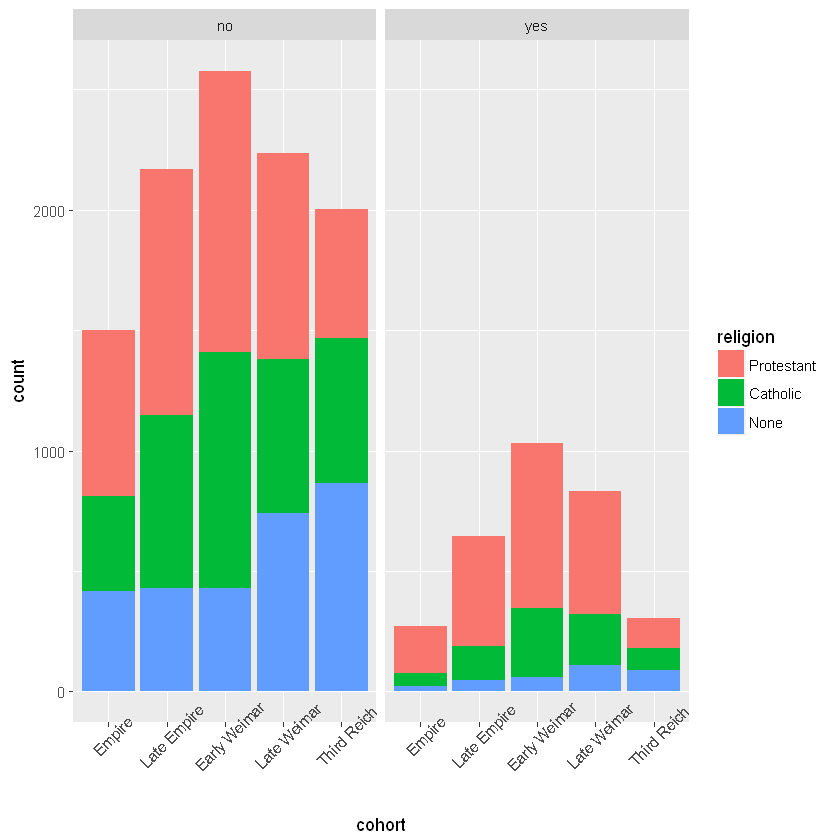

In [178]:
nazi %>%
  dplyr::select(religion, cohort, membership) %>%
  ggplot(mapping = aes(x = cohort, fill=religion)) +
  geom_bar() +
  facet_grid(. ~ membership) + 
  theme(axis.text.x = element_text(angle = 45))

### Devil in the details 
You can use a dotplot for very small data. Once again, let's use dplyr to select and filter our data. Example: *How many women supported Nazism during the Early Weimar era?*

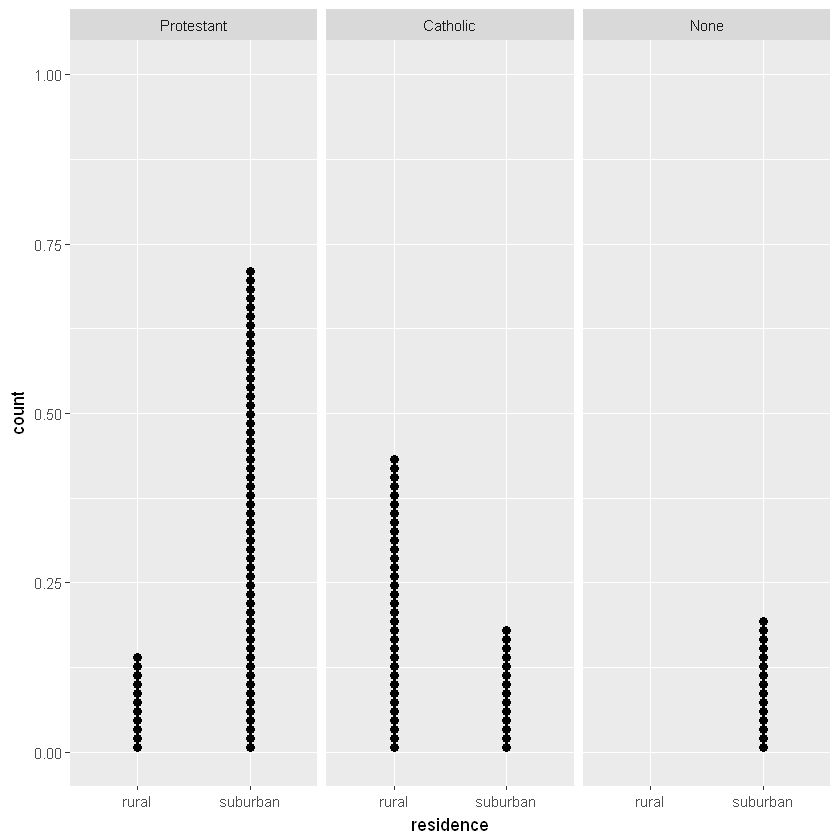

In [179]:
nazi %>%
  dplyr::select(gender, residence, membership, religion, cohort) %>%
  filter(gender == "female") %>%
  filter(membership == "yes") %>%
  filter(cohort == "Early Weimar") %>%
  ggplot(mapping = aes(x = residence)) +
  facet_grid(. ~ religion) +
  geom_dotplot(binwidth = .08) 

### Did more Nazi-supporting teachers live in rural or urban environments?
A bubble chart can be an effective form of data visualization but should be used with care. Too many observations makes the chart unreadable. 

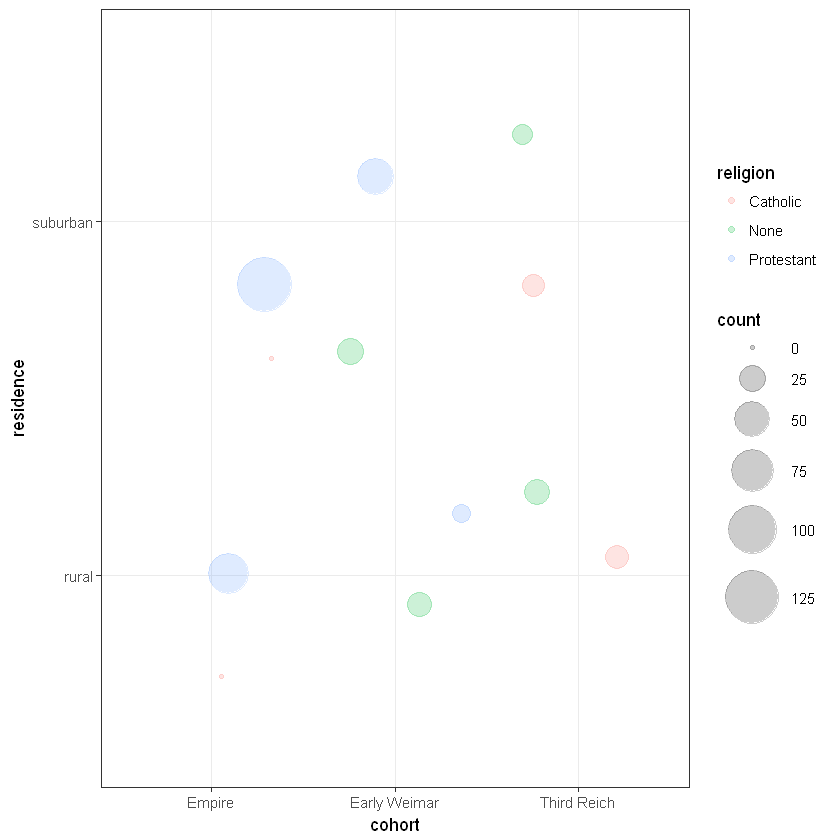

In [180]:
# Read in original data, which already grouped and counted data  
ognazi <- read.csv("C:/Users/broadwmc/Desktop/nazi.csv") 
ognazi$cohort <- factor(ognazi$cohort,levels = c("Empire", "Late Empire", "Early Weimar", "Late Weimar", "Third Reich"))
ognazi %>%
  dplyr::select(cohort, residence, religion, count, membership) %>%
  filter(membership == "yes") %>%
  filter(cohort == c("Empire", "Early Weimar", "Third Reich")) %>%
  ggplot(mapping = aes(x=cohort, y=residence, label = "")) +
  geom_jitter(aes(size = count, colour = religion),alpha=.2) +
  geom_text(hjust = 1, size = 2) +
  scale_size(range = c(1,15)) +
  theme_bw()


### Other datasets and more ggplot2 functions
#### The diamonds dataset
The diamonds dataset contains the prices and other attributes of almost 54,000 diamonds. Diamonds dataset comes pre-installed with R. 

In [181]:
# Load and explore data --- 
data("diamonds")
summary(diamonds)


     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

In [182]:
# Pre-process data---
colnames(diamonds)[8] <- "length"
colnames(diamonds)[9] <- "width"
colnames(diamonds)[5] <- "total.depth"
colnames(diamonds)[10] <- "depth"

In [183]:
 ## Questions for analysis --
        # What is the range of cost for diamonds? Cost of color?
        # Does price range fall under a normal distriubtion curve?
        # Histograpm alternate: density plot
        # Relatonship between cut, color, and carat: What is the best value for color, cut, and carat?

### What is the distribution of diamond cost? 

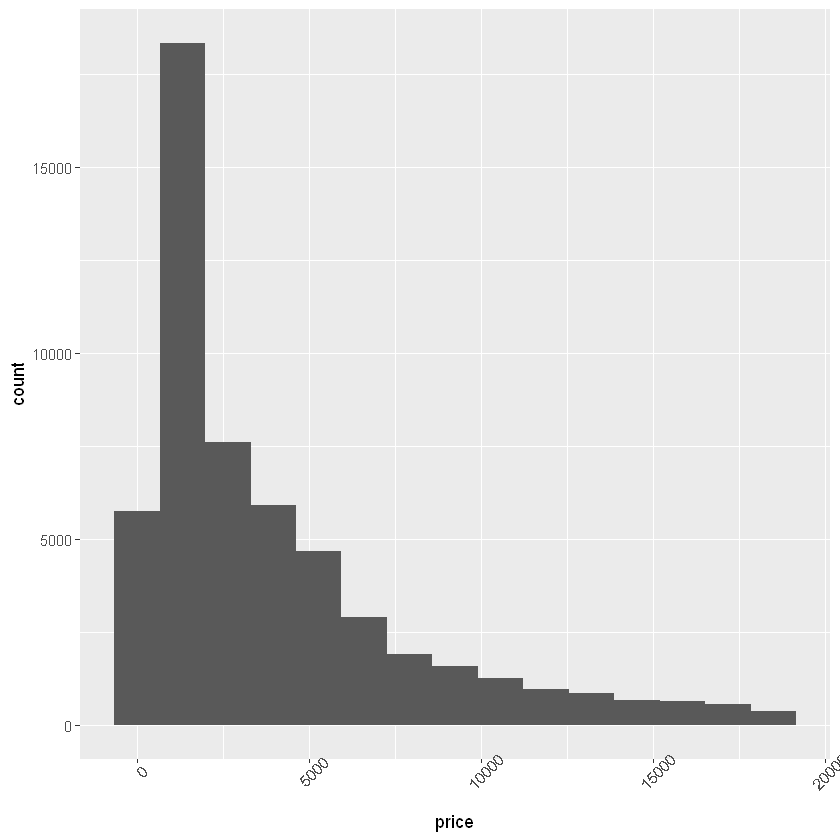

In [184]:
# We're working with two quantitative variables and we want to examine count. Start with a histogram.  
ggplot(diamonds, aes(price)) +
  geom_histogram(bins = 15) +
  theme(axis.text.x = element_text(angle = 45))


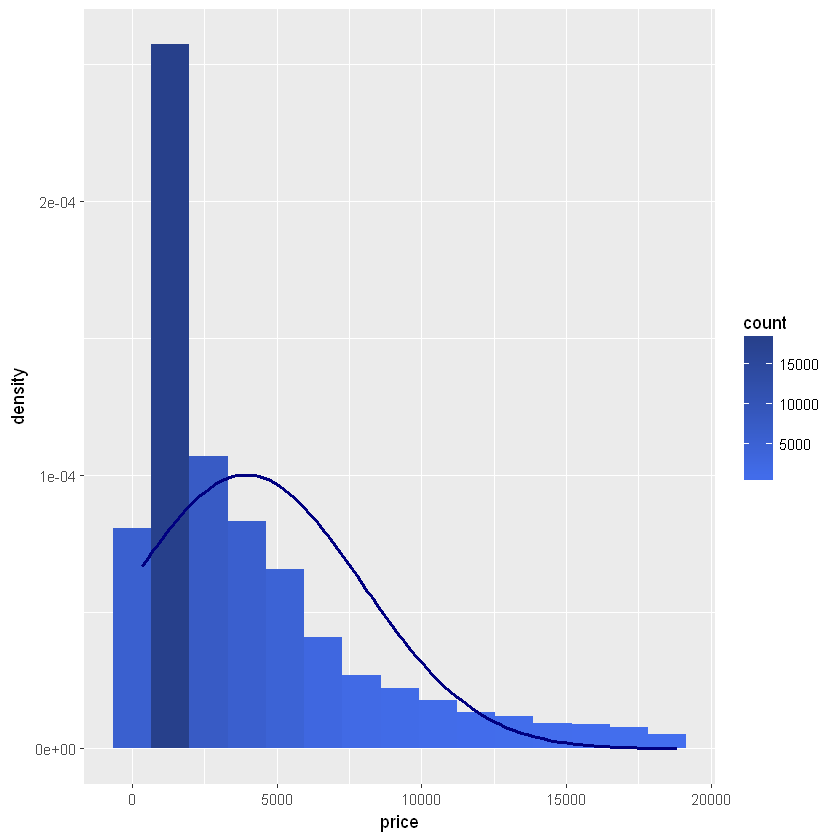

In [185]:
# Add a normal curve to our distribution  
ggplot(diamonds, aes(price)) +
  geom_histogram(bins = 15,  
                 aes(y=..density.., fill=..count..)) +
  scale_fill_gradient(low="royalblue2", high="royalblue4") +
  stat_function(fun=dnorm,
                color="navy",
                size = 1, 
                args=list(mean=mean(diamonds$price), 
                          sd=sd(diamonds$price))) 

### What is the relationship between clarity, carat, and cut? 

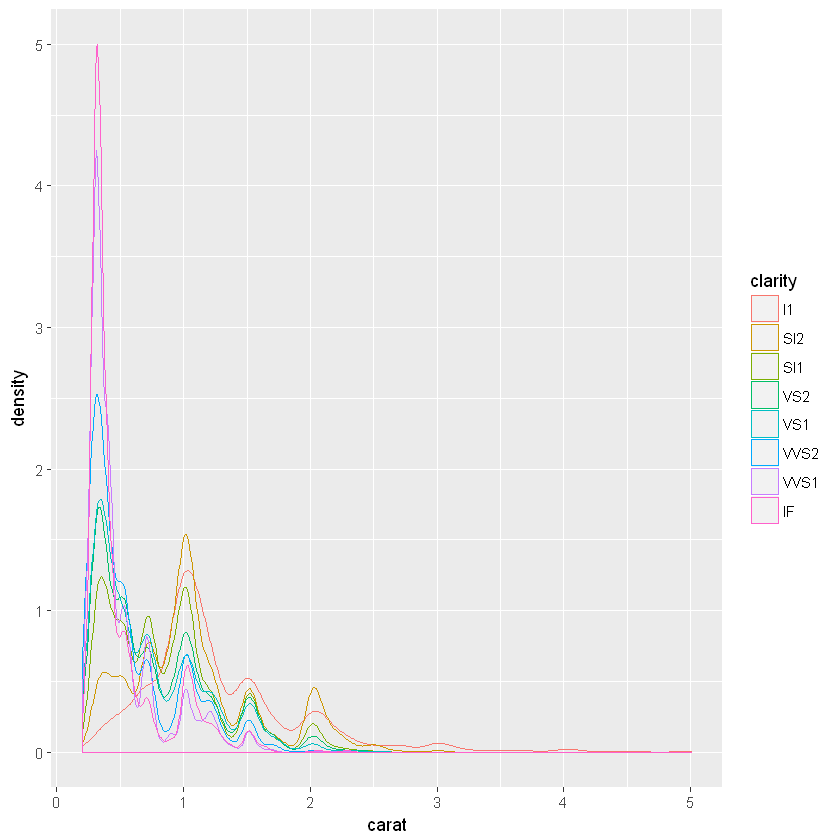

In [186]:
# An alternative to a histogram: density plot 
## Add fill (argument of aes) and alpha (arguement of geom_density) to shade plots 
ggplot(diamonds, aes(carat, colour=clarity)) +
  geom_density() 

### What is the relationship between carat, color, and cut? 

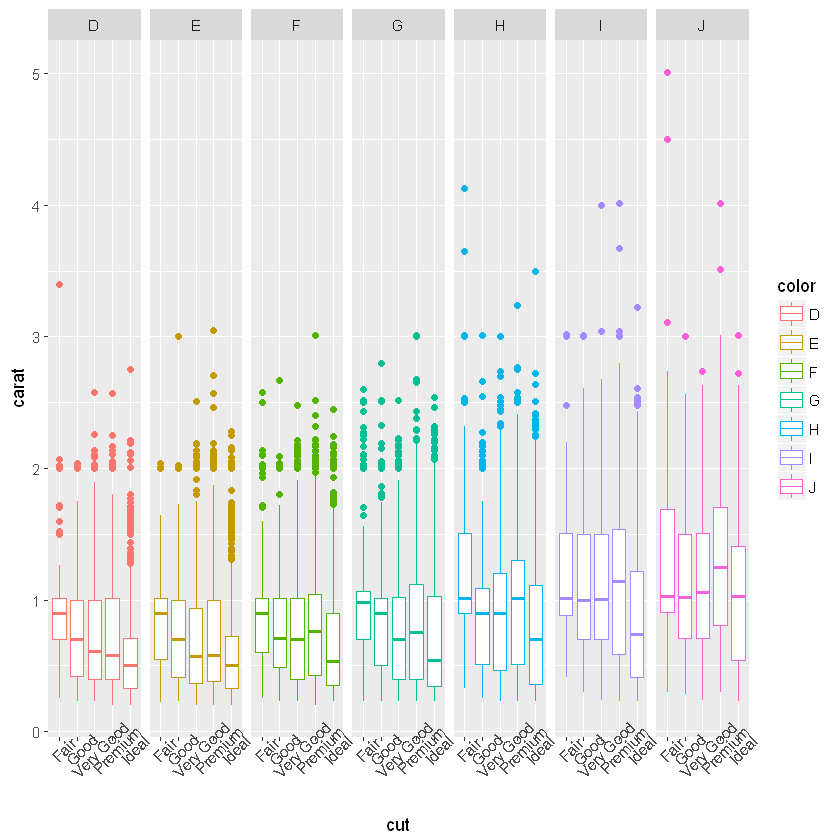

In [187]:
# Create a box-and-whiskers plot  
## Excellent for examining IQR, median, range, and outliers of your data.   
ggplot(diamonds, aes(x = cut, y = carat, 
                   colour = color)) + 
  geom_boxplot() +
  facet_grid(.~color) +
  theme(axis.text.x = element_text(angle = 45))

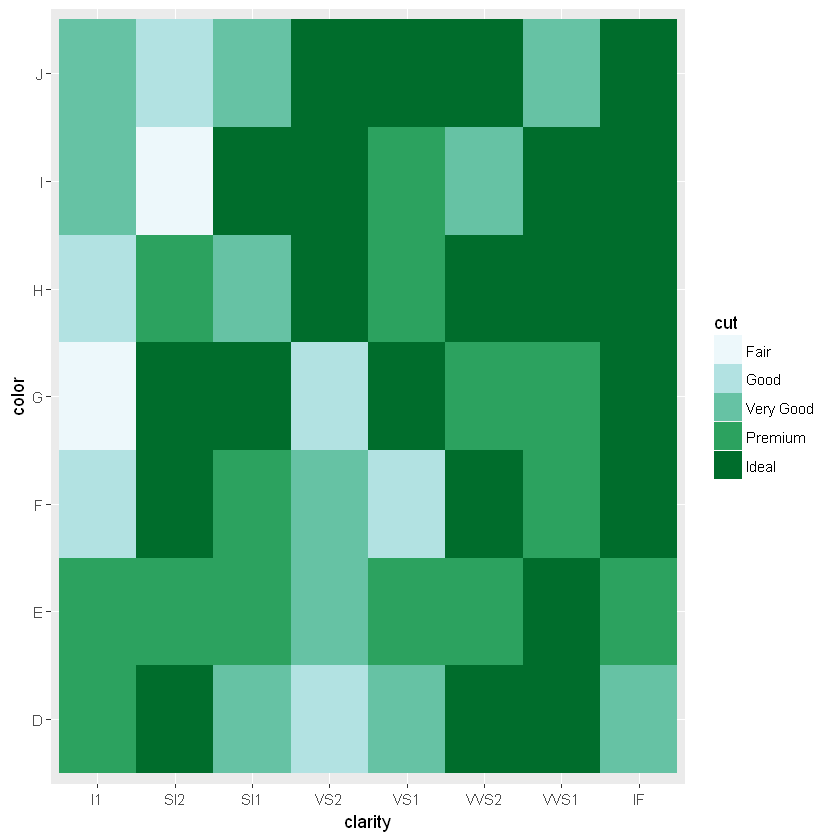

In [188]:
# Create a heat map 
## Not intuitive data visualization, but pretty 
ggplot(diamonds, aes(x = clarity, y = color)) +
  geom_tile(aes(fill = cut)) +
  scale_fill_brewer(palette = "BuGn")

### What is the correlation between carat and price? 

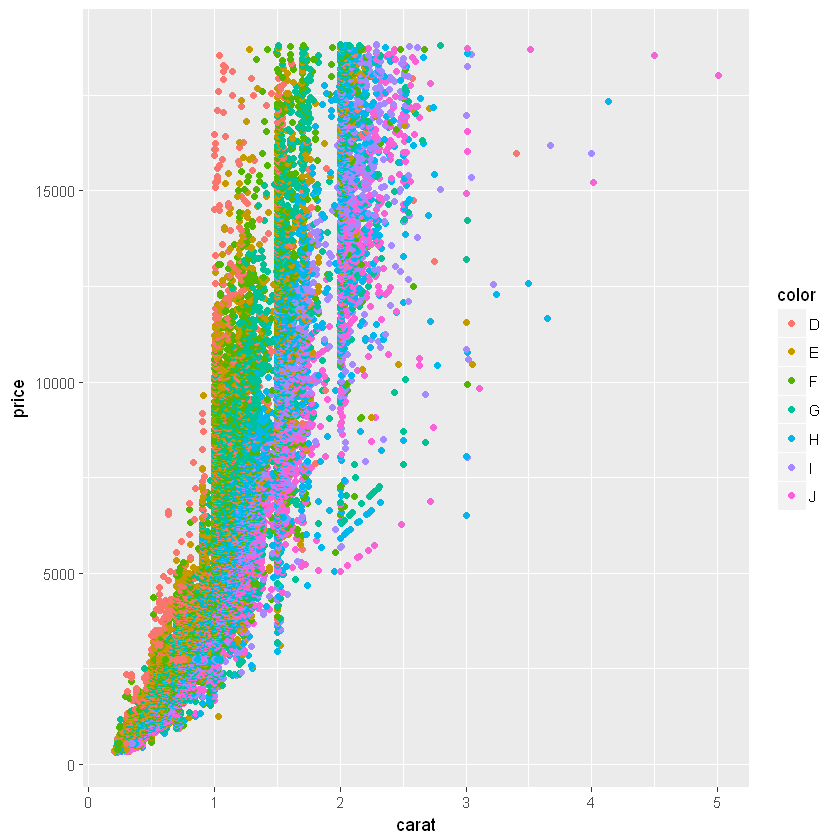

In [189]:
# Create a scatterplot
## A good visualization for examining the relationship (positive, negative) between x and y variables. Here we see a postive relationship between our independent variable (x) and dependent variable (y).  
ggplot(diamonds, aes(x=carat, y=price, colour=color)) +
  geom_point()

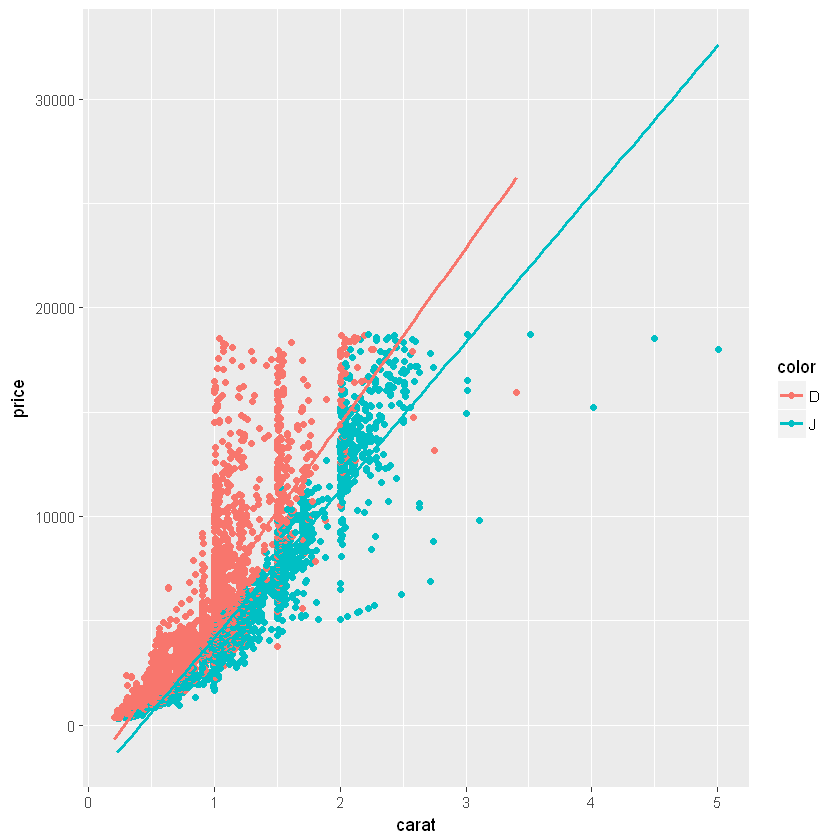

In [190]:
# Let's return to what we learned with dplyr. Filter diamonds data using dplyr() and add a linear regression line
## Change "lm" to "loess" and se = TRUE to change model 
diamonds %>% 
  dplyr::select(carat,price,color) %>%
  filter(color %in% c("D","J")) %>%
  ggplot(mapping=aes(x=carat, y=price, colour=color)) +
  geom_point() +
  geom_smooth(method="lm", se=FALSE)

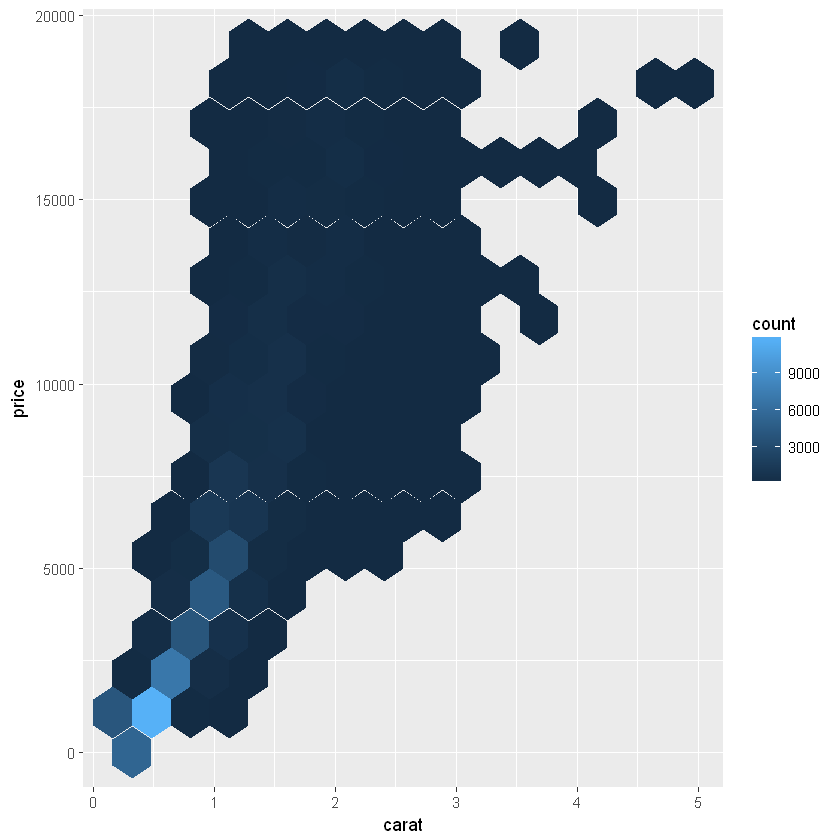

In [191]:
# Create a hexbin 
## A hexbin is another alternative for visualizing count, although not as effective as a histogram. 
ggplot(diamonds, aes(x=carat, y=price)) +
  geom_hex(bins=15)

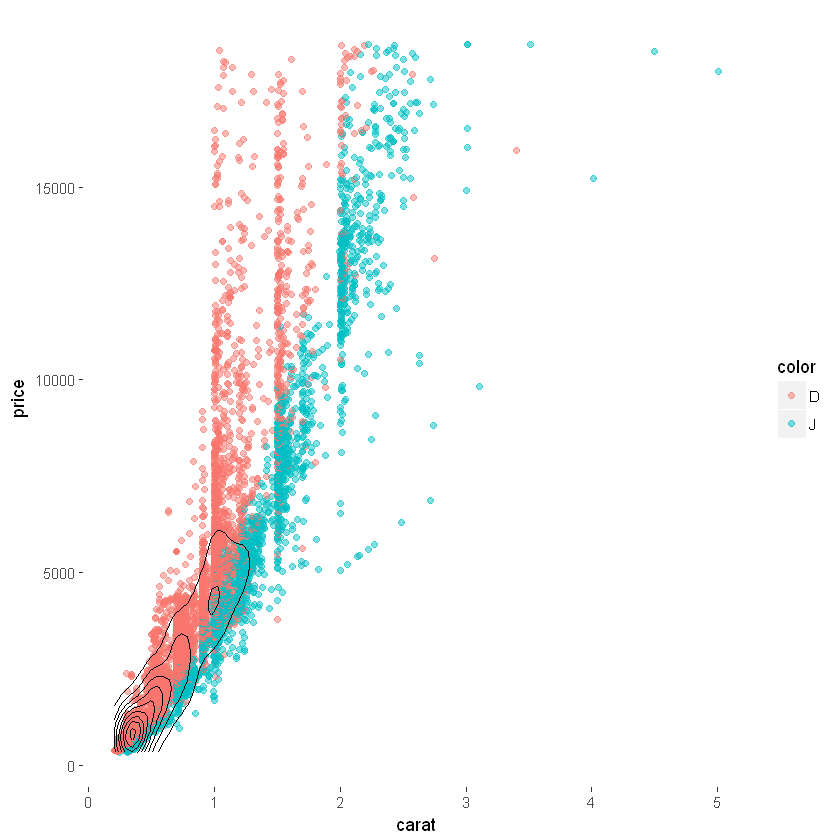

In [192]:
# Add a 2D overlay desity estimate to your scatterplot
## The MASS library works together with ggplot2 and dplyr to create your 2D density 
diamonds %>% 
  dplyr::select(carat,price,color) %>%
  filter(color %in% c("D","J")) %>%
  ggplot(mapping=aes(x=carat, y=price, colour=color)) +
  geom_point(alpha = 0.5) + 
  geom_density_2d(colour="black", size=.5) + 
  theme(panel.background = element_rect(fill = '#ffffff')) 

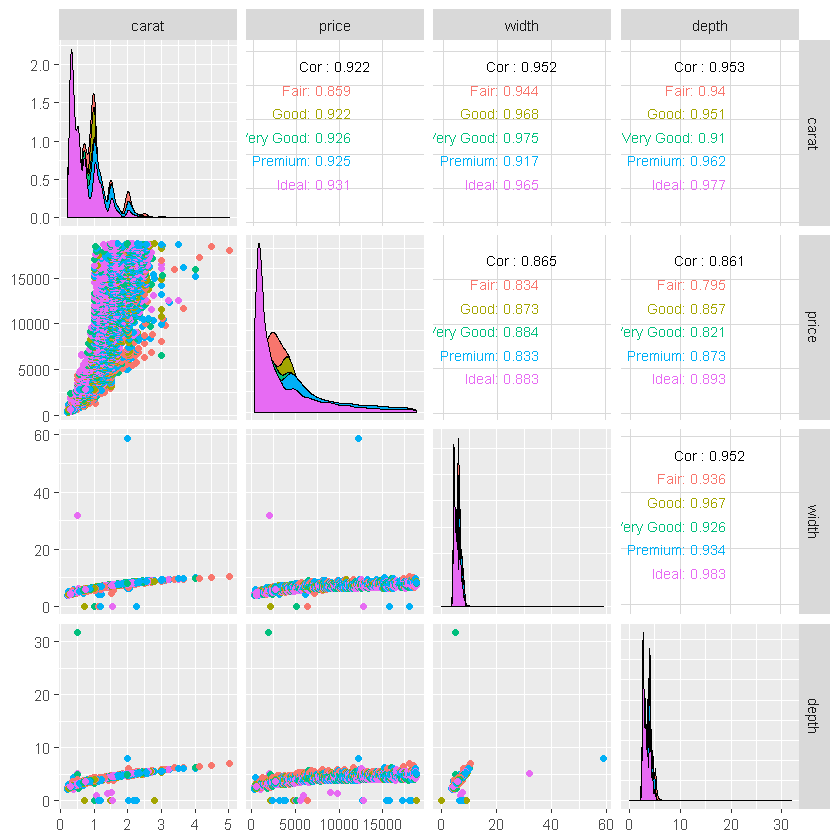

In [193]:
# To create a pairwise plot, use the GGally library
ggpairs(
  data = diamonds, 
  mapping = ggplot2::aes(colour = cut),
  columns = c(1,7,9,10),
  diag = list(continuous = "densityDiag"), 
  upper = list(continuous = wrap("cor", size = 3)),
  axisLabels = "show")


## Conclusion
ggplot2 is a powerful R visualization library. Coupled together with libraries such as GGally and hexbin, you can create any visualization you need for your data.

### Resources
[ggplot2.tidyverse.org](http://ggplot2.tidyverse.org/)

[ggplot2 book by Hadley Wickham](https://github.com/hadley/ggplot2-book)

[Programming with ggplot2 by Hadley Wickham](https://rpubs.com/hadley/97970)

[GGAlly - Extension to ggplot2](http://ggobi.github.io/ggally/#ggally)

[An introduction to dplyr](https://cran.r-project.org/web/packages/dplyr/vignettes/dplyr.html)
